# Predicting Customer Transactions of Santander

## 1) Project Description

### Business Understanding
In traditional banking, bank accounts are opened by the end customers/consumers to conduct critical and common banking transactions – payments and transfers, loan disbursements and repayments, forex transactions, investment and private banking etc.

### Problem Understanding
> In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. 

Therefore, we can say this problem relates to a classification problem

**Data:**
The data was downloaded from kaggle: [Santander: Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview/description)


**Evaluation:**
The evaluation metric for this competition is the Area Under the Curve (AUC / ROC) - Score between the predicted probability and the observed target.

**Submission:**
For each Id in the test set, you must make a binary prediction of the target variable. The file should contain a header and have the following format:


```
 ID_code,target
 test_0,0
 test_1,1
 test_2,0
 etc.
```



### Approach
**6 Step Machine Learning Modelling Framework**

<img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework.png?raw=1" width=900/>

**Detailed Steps:**
1. Exploring the Data
2. Checking Column-Types
3. Dropping missing Data
4. Define Evaluation metrics
5. Build Base-Models
6. Feature Engineering I: Identifying Features for Standardization
7. Feature Engineering II: Encoding Categorical Features
8. Feature Engineering III: Extracting datetime-Objects
9. Feature Selection: Remove redundant Features
10. Build Base-Models II
11. Experimentations: Hyperparameter-Tuning & Feature Engineering
12. Make Predictions


## 2) Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio_Projects/01_ML_Projects/03_Customer_Transaction_Prediction/datasets/train.csv")

In [ ]:
df.head()


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df.shape

(200000, 202)

The dataset contains 200.000 observations made up of 200 features.
The features are anomalized, thus we are kind of limited to the feature engineering process and might think of carefully select features based on collinearity.


#### Checking for column types

In [ ]:
df.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [ ]:
df.select_dtypes(int).columns

Index(['target'], dtype='object')

Only the target column is of type **`int`**

In [ ]:
df.select_dtypes(object).columns

Index(['ID_code'], dtype='object')

In [ ]:
df.select_dtypes(float).columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

It seems that every features is of type **`float`**.
To confirm this assumption we compute the length of this list.

In [ ]:
len(df.select_dtypes(float).columns)

200

So there are 200 features formatted as **`float`**-type.

#### Checking for missing data

In [ ]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
for column in df.columns:
  if df[column].isnull().sum() > 0:
    print(df.column.isnull().sum())

There are no missing values in the dataset.

#### Check for unique values

In [ ]:
# create a unique function

def df_unique(df):
  
  columns = []
  unique_values = []

  for column in df.columns:
    n_unique = df[column].nunique()
    columns.append(column)
    unique_values.append(n_unique)

  # Create dataframe
  dictionary = {"Column": columns,
                "Unique_values": unique_values}
  
  df_uni = pd.DataFrame(dictionary)

  return df_uni

In [ ]:
df_unique = df_unique(df)

In [ ]:
df_unique.sort_values(by = "Unique_values", ascending = False, inplace = True)

In [ ]:
df_unique

,Column,Unique_values
0,ID_code,200000
47,var_45,169968
119,var_117,164469
76,var_74,161058
63,var_61,159369
...,...,...
105,var_103,9376
110,var_108,8525
93,var_91,7962
70,var_68,451


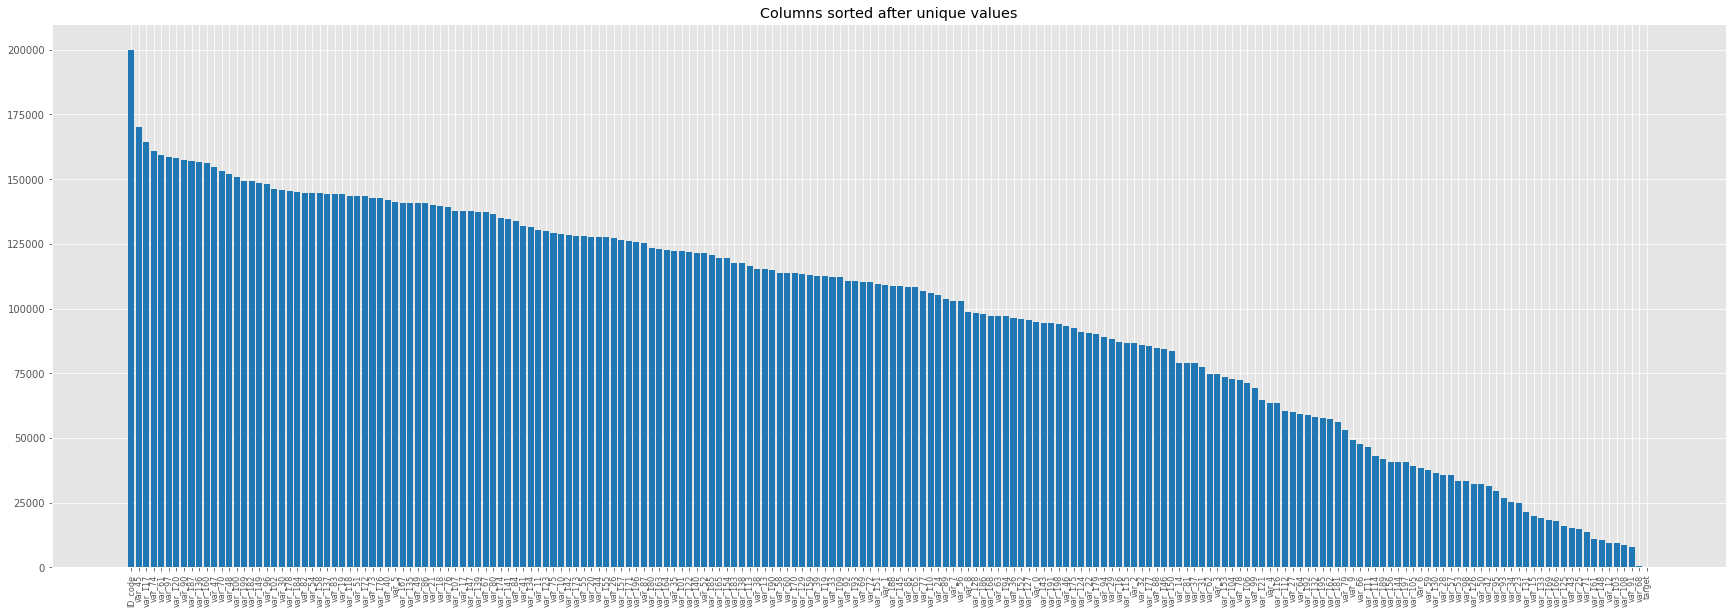

In [ ]:
import matplotlib.pyplot as plt

# Set figure layout
plt.style.use("ggplot")
plt.figure(figsize = (30, 10))

# Plot Barplot

plt.bar(x = df_unique["Column"], height = df_unique["Unique_values"], color = "tab:blue")

plt.title("Columns sorted after unique values")
plt.xticks(rotation = 90, size = 8);


This plot gives us not much information except the following:
> The ID_code has 200 distinct values, which indicate a customer ID number. For our ML model the ID_code is of no relevance. Therefore we drop it.

However, there might be dependancy between higher customer IDs and lower customer IDs. Higher customer IDs indicate "younger" customers and thus their behavior might be significantly different from "older" customers.

Nevertheless, we cannot derive such information due to the anonymized features.

In [ ]:
# Drop customer ID
df.drop("ID_code", axis = 1, inplace = True)

Before we start building our first base models, it might be useful to have a look at the distribution of the target column. 
From the description in Kaggle 

#### Checking for imbalance

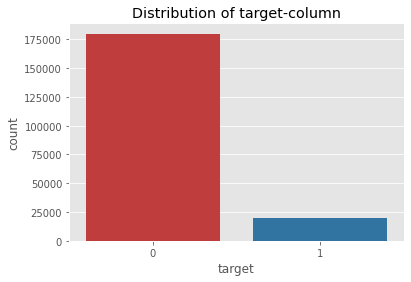

In [ ]:
# Use seaborns' countplot
sns.countplot(data = df, x = "target", palette = ["tab:red","tab:blue"])
plt.title("Distribution of target-column");

In [ ]:
pct_zeros = len(df[df["target"] == 0]) / len(df["target"])
pct_ones = len(df[df["target"] == 1]) / len(df["target"])

print(f"The `target`-column contains {round(pct_zeros*100, 1)}% Zeros and {round(pct_ones*100, 1)}% Ones")

The `target`-column contains 90.0% Zeros and 10.0% Ones


The target column is highly unevenly distributed. In such cases, we must carefully split the data in a stratified way, such that the distribution of the train and test set are following the dataset's distribution respectively.

#### Checking for Skewness

In [ ]:
from scipy.stats import skew
right_skewed, left_skewed, no_skeweness = 0, 0, 0

for col in df.drop("target", axis = 1):
    if skew(df[col])>0:
        right_skewed+=1        
    elif skew(df[col])==0:
        no_skeweness+=1
    else:
        left_skewed+=1

print("Features that are left skewed are: ", left_skewed)
print("Features that are left skewed are: ", right_skewed)
print("Features that are not skewed are: ", no_skeweness)

Features that are left skewed are:  88
Features that are left skewed are:  112
Features that are not skewed are:  0


**Q-Q-Plots**

Q-Q plots plot the data against a specified distribution. In this case the specified distribution would be ‘norm’. In Python, Q-Q plot can be plotted using the ‘probplot’ method of ‘scipy.stats’ module as shown below. In case the values of a certain feature follow the read line, the respective feature is normally distributed.

In [ ]:
# Import plot
from scipy.stats import probplot

for col in df.columns:
  plt.figure(figsize = (15, 4))
  probplot(x = df[col],dist='norm',plot=plt)
  plt.title(col, fontsize = 14)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

We use the PowerTransformer from sklearn to make data look more normally distributed

In [ ]:
# Import PowerTransformer()
from sklearn.preprocessing import PowerTransformer
pt_scaler = PowerTransformer(method = "yeo-johnson")

# Apply StandardScaler and create df consisting of features
X_train_pt = pd.DataFrame(pt_scaler.fit_transform(df.drop("target", axis = 1)), 
                            columns = df.drop("target", axis = 1).columns)


X_train_pt.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.541951,-1.270933,0.495771,-0.828213,0.231139,-0.547992,-0.305226,0.625352,-1.531159,-1.444078,0.451927,1.076308,-0.081814,-1.707456,0.576010,-0.001111,-1.447191,-0.248577,-1.420671,2.164009,-0.428304,-0.111147,-0.570281,-1.040807,1.001625,-0.814448,-0.163977,0.466466,-0.771480,0.388264,0.884901,1.155894,-1.293635,0.512134,-0.451013,1.292911,-0.484918,0.898314,-1.418179,0.787861,...,-0.778413,-1.476230,-1.238392,-1.137909,1.854287,-1.326557,-0.716853,0.423078,1.446775,-0.402208,-1.081816,-1.412478,0.136981,0.633595,-0.238598,-1.384060,-0.968670,0.720047,-0.299008,-0.268009,-1.076270,-0.763882,0.264794,1.228938,1.358528,2.167177,0.901623,-0.808734,0.567258,-0.151030,0.279108,-1.160661,0.819680,-0.423569,0.176466,-1.618867,1.018892,-0.377020,-1.031448,0.146234
1,0.313202,-0.623404,1.171251,-0.681002,0.789603,1.587890,0.275008,0.025538,0.857323,0.395719,-0.157817,1.874517,-0.028103,-0.029820,-0.928942,-2.151421,1.682404,-1.443193,-0.929298,1.922402,-1.770451,-1.802210,1.444134,0.677285,-0.944565,0.798510,-1.328279,-0.931033,-0.624626,-1.813066,-0.246553,-1.170556,0.690914,1.056825,-0.122764,-0.590077,0.195710,0.014418,0.066188,0.738949,...,0.512127,1.077234,-1.087640,0.919247,-0.419856,-0.830052,0.635874,1.767862,-0.292468,0.442449,1.242193,1.102595,0.268520,1.041594,1.417573,-0.359370,-0.602528,1.702968,-0.740203,2.821394,-0.542247,-0.401819,-1.749556,0.174554,1.033545,-0.201481,-0.387378,-0.498172,-0.507852,-1.131433,0.961749,0.139973,0.456674,1.935122,-0.814092,1.491473,1.063537,-0.132788,0.821726,0.451883
2,-0.652266,-0.278896,0.557451,0.543438,-0.310110,-0.523600,1.707780,-0.543101,-1.530961,-1.292155,-0.143655,-1.350317,0.885350,-0.267610,0.019509,0.188296,-0.620110,0.562257,-1.360544,0.993282,0.770323,0.121049,-1.077663,0.939391,-1.335057,-1.634994,-0.660947,-1.151308,0.395989,0.442508,-0.458889,0.968808,-0.688552,0.985541,-0.721224,0.059361,0.804528,0.490634,0.083683,0.048839,...,-1.004725,0.968154,-0.445427,-0.994349,0.287344,0.241524,0.852035,-0.200086,0.776481,0.358700,-1.628387,-0.572439,-1.460197,-0.863411,0.765471,-0.209865,0.297108,-1.170962,-1.010594,-0.026466,-0.295241,-0.475409,-1.564571,-1.261952,1.087310,-0.292352,-1.130280,0.311089,-1.325336,-1.648702,-0.050666,0.791873,-0.152638,-0.424871,1.148321,2.208916,-1.635699,-0.697113,-0.407562,0.291798
3,0.171945,-0.132746,-0.634599,0.205896,0.927800,0.377005,0.524729,-0.450020,-1.796542,0.529987,0.337702,1.015182,-0.940792,0.741084,-0.458710,0.646508,0.577908,0.761782,0.123278,0.192192,1.169866,-0.558500,0.882674,-0.550122,0.448696,0.275638,0.841674,0.138356,0.473860,-0.825778,-0.936482,0.038764,-0.797656,-2.109854,-1.517335,-1.909179,1.919776,-1.358678,-0.317195,-0.008863,...,0.718033,1.528633,1.286979,-1.389772,-1.454968,-0.406931,-1.015677,0.166170,-1.452747,-0.793744,-1.642847,-0.996798,-0.165404,2.123690,-0.770675,-1.244729,2.042202,0.802568,-1.098883,1.092849,-0.192855,-1.245583,0.134976,-0.304867,-1.452297,0.817727,-0.298689,-0.241225,-0.741862,1.123978,0.285801,-0.874612,-0.805128,-0.490979,1.594957,-0.784272,-0.957281,1.506194,0.687482,-0.572735
4,-0.230940,0.031895,0.836418,-0.066150,0.736829,0.945718,0.633382,0.800704,1.843737,0.058876,-1.766125,-1.499387,-0.931778,-0.143039,0.136436,1.168066,-0.291938,0.363373,-1.103644,-0.101746,1.343285,0.220252,1.938272,-0.566958,0.959464,-0.407965,1.213495,-1.431459,0.466801,1.088798,0.505516,-0.414148,0.186496,1.046630,1.803829

Before checking for outliers we need to concatenate both the X_train_pt and y.

In [ ]:
df = pd.concat([df["target"], X_train_pt], axis = 1)
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,-0.541951,-1.270933,0.495771,-0.828213,0.231139,-0.547992,-0.305226,0.625352,-1.531159,-1.444078,0.451927,1.076308,-0.081814,-1.707456,0.576010,-0.001111,-1.447191,-0.248577,-1.420671,2.164009,-0.428304,-0.111147,-0.570281,-1.040807,1.001625,-0.814448,-0.163977,0.466466,-0.771480,0.388264,0.884901,1.155894,-1.293635,0.512134,-0.451013,1.292911,-0.484918,0.898314,-1.418179,...,-0.778413,-1.476230,-1.238392,-1.137909,1.854287,-1.326557,-0.716853,0.423078,1.446775,-0.402208,-1.081816,-1.412478,0.136981,0.633595,-0.238598,-1.384060,-0.968670,0.720047,-0.299008,-0.268009,-1.076270,-0.763882,0.264794,1.228938,1.358528,2.167177,0.901623,-0.808734,0.567258,-0.151030,0.279108,-1.160661,0.819680,-0.423569,0.176466,-1.618867,1.018892,-0.377020,-1.031448,0.146234
1,0,0.313202,-0.623404,1.171251,-0.681002,0.789603,1.587890,0.275008,0.025538,0.857323,0.395719,-0.157817,1.874517,-0.028103,-0.029820,-0.928942,-2.151421,1.682404,-1.443193,-0.929298,1.922402,-1.770451,-1.802210,1.444134,0.677285,-0.944565,0.798510,-1.328279,-0.931033,-0.624626,-1.813066,-0.246553,-1.170556,0.690914,1.056825,-0.122764,-0.590077,0.195710,0.014418,0.066188,...,0.512127,1.077234,-1.087640,0.919247,-0.419856,-0.830052,0.635874,1.767862,-0.292468,0.442449,1.242193,1.102595,0.268520,1.041594,1.417573,-0.359370,-0.602528,1.702968,-0.740203,2.821394,-0.542247,-0.401819,-1.749556,0.174554,1.033545,-0.201481,-0.387378,-0.498172,-0.507852,-1.131433,0.961749,0.139973,0.456674,1.935122,-0.814092,1.491473,1.063537,-0.132788,0.821726,0.451883
2,0,-0.652266,-0.278896,0.557451,0.543438,-0.310110,-0.523600,1.707780,-0.543101,-1.530961,-1.292155,-0.143655,-1.350317,0.885350,-0.267610,0.019509,0.188296,-0.620110,0.562257,-1.360544,0.993282,0.770323,0.121049,-1.077663,0.939391,-1.335057,-1.634994,-0.660947,-1.151308,0.395989,0.442508,-0.458889,0.968808,-0.688552,0.985541,-0.721224,0.059361,0.804528,0.490634,0.083683,...,-1.004725,0.968154,-0.445427,-0.994349,0.287344,0.241524,0.852035,-0.200086,0.776481,0.358700,-1.628387,-0.572439,-1.460197,-0.863411,0.765471,-0.209865,0.297108,-1.170962,-1.010594,-0.026466,-0.295241,-0.475409,-1.564571,-1.261952,1.087310,-0.292352,-1.130280,0.311089,-1.325336,-1.648702,-0.050666,0.791873,-0.152638,-0.424871,1.148321,2.208916,-1.635699,-0.697113,-0.407562,0.291798
3,0,0.171945,-0.132746,-0.634599,0.205896,0.927800,0.377005,0.524729,-0.450020,-1.796542,0.529987,0.337702,1.015182,-0.940792,0.741084,-0.458710,0.646508,0.577908,0.761782,0.123278,0.192192,1.169866,-0.558500,0.882674,-0.550122,0.448696,0.275638,0.841674,0.138356,0.473860,-0.825778,-0.936482,0.038764,-0.797656,-2.109854,-1.517335,-1.909179,1.919776,-1.358678,-0.317195,...,0.718033,1.528633,1.286979,-1.389772,-1.454968,-0.406931,-1.015677,0.166170,-1.452747,-0.793744,-1.642847,-0.996798,-0.165404,2.123690,-0.770675,-1.244729,2.042202,0.802568,-1.098883,1.092849,-0.192855,-1.245583,0.134976,-0.304867,-1.452297,0.817727,-0.298689,-0.241225,-0.741862,1.123978,0.285801,-0.874612,-0.805128,-0.490979,1.594957,-0.784272,-0.957281,1.506194,0.687482,-0.572735
4,0,-0.230940,0.031895,0.836418,-0.066150,0.736829,0.945718,0.633382,0.800704,1.843737,0.058876,-1.766125,-1.499387,-0.931778,-0.143039,0.136436,1.168066,-0.291938,0.363373,-1.103644,-0.101746,1.343285,0.220252,1.938272,-0.566958,0.959464,-0.407965,1.213495,-1.431459,0.466801,1.088798,0.505516,-0.414148,0.186496,1.046630,1.803829,-0.610872,0.193369,0.00338

#### Checking for Outliers

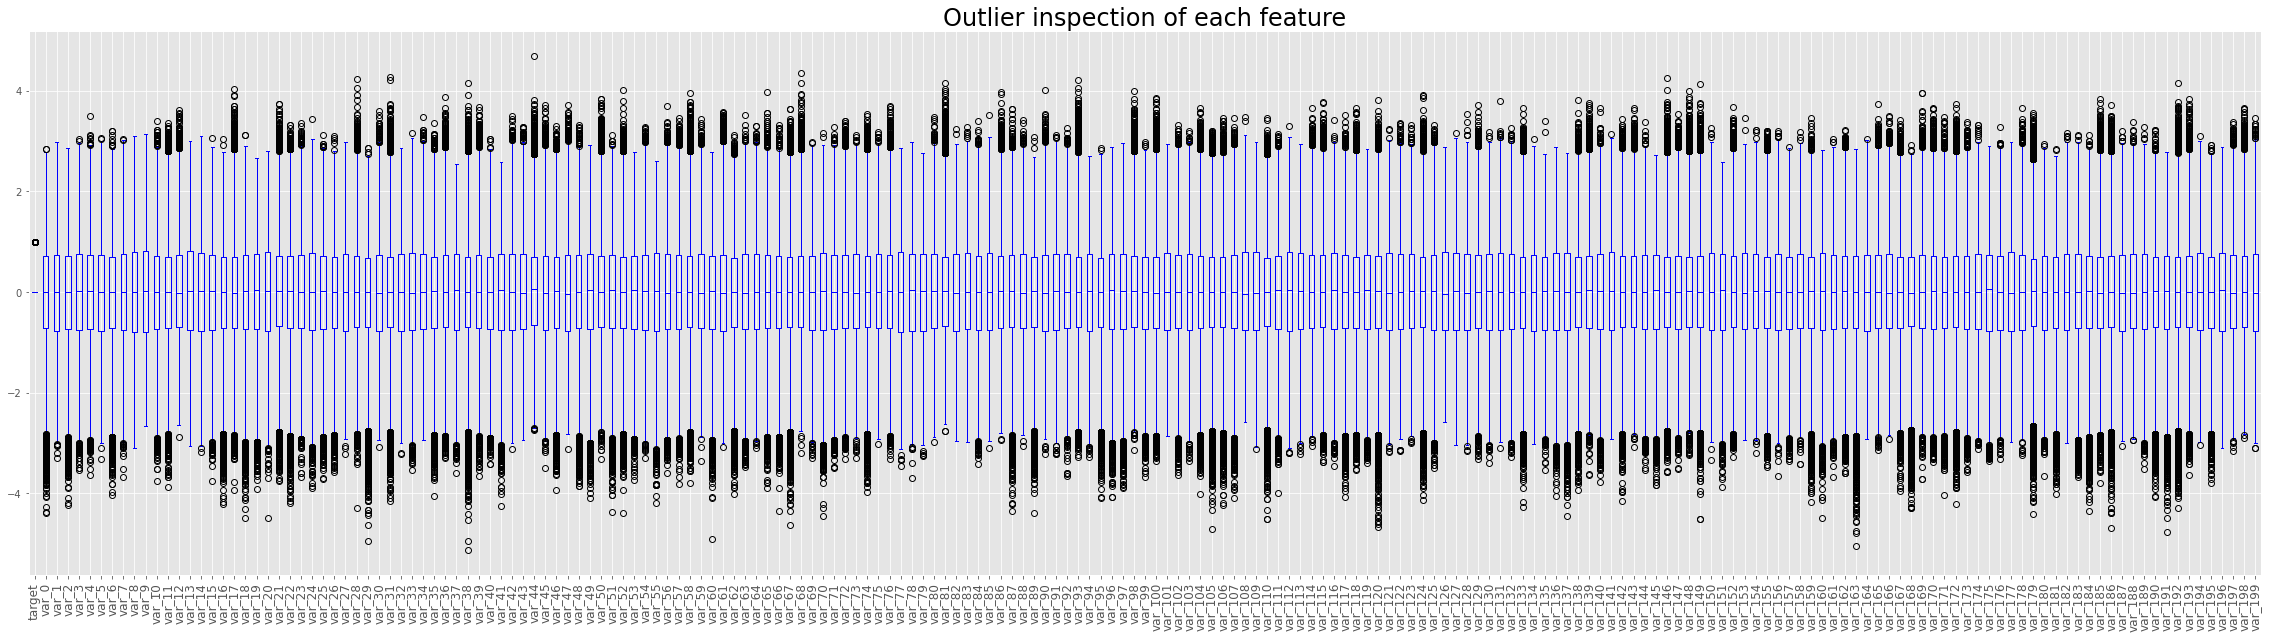

In [ ]:
import seaborn as sns

plt.figure(figsize = (40, 10))

df.boxplot(color = "blue")

plt.title("Outlier inspection of each feature", fontsize = 24)
plt.xticks(rotation = 90, fontsize = 12);

As the plot above demonstrates, outliers do exist and have most probably an influence on the models performance.

Therefore we remove these outliers based on the 3x standard deviation from the mean.

The implementation looks as follows: 
We compute the absolute z-score for each data point in each feature. The z-score tells you how many standard deviations from the mean your score is.
It is computed by taking the difference of datapoint_i and the mean of the feature and divide the result by the standard deviation of this respective feature.

Usually, we need to consider that once we remove these outliers, we also loose potential important information. However, since we deal with a huge amount of data, its worth a try to see how base models perform using a trimmed dataset without outliers.

In [ ]:
from scipy.stats import zscore
df_trimmed = df[(np.abs(zscore(df)) < 3).all(axis=1)]

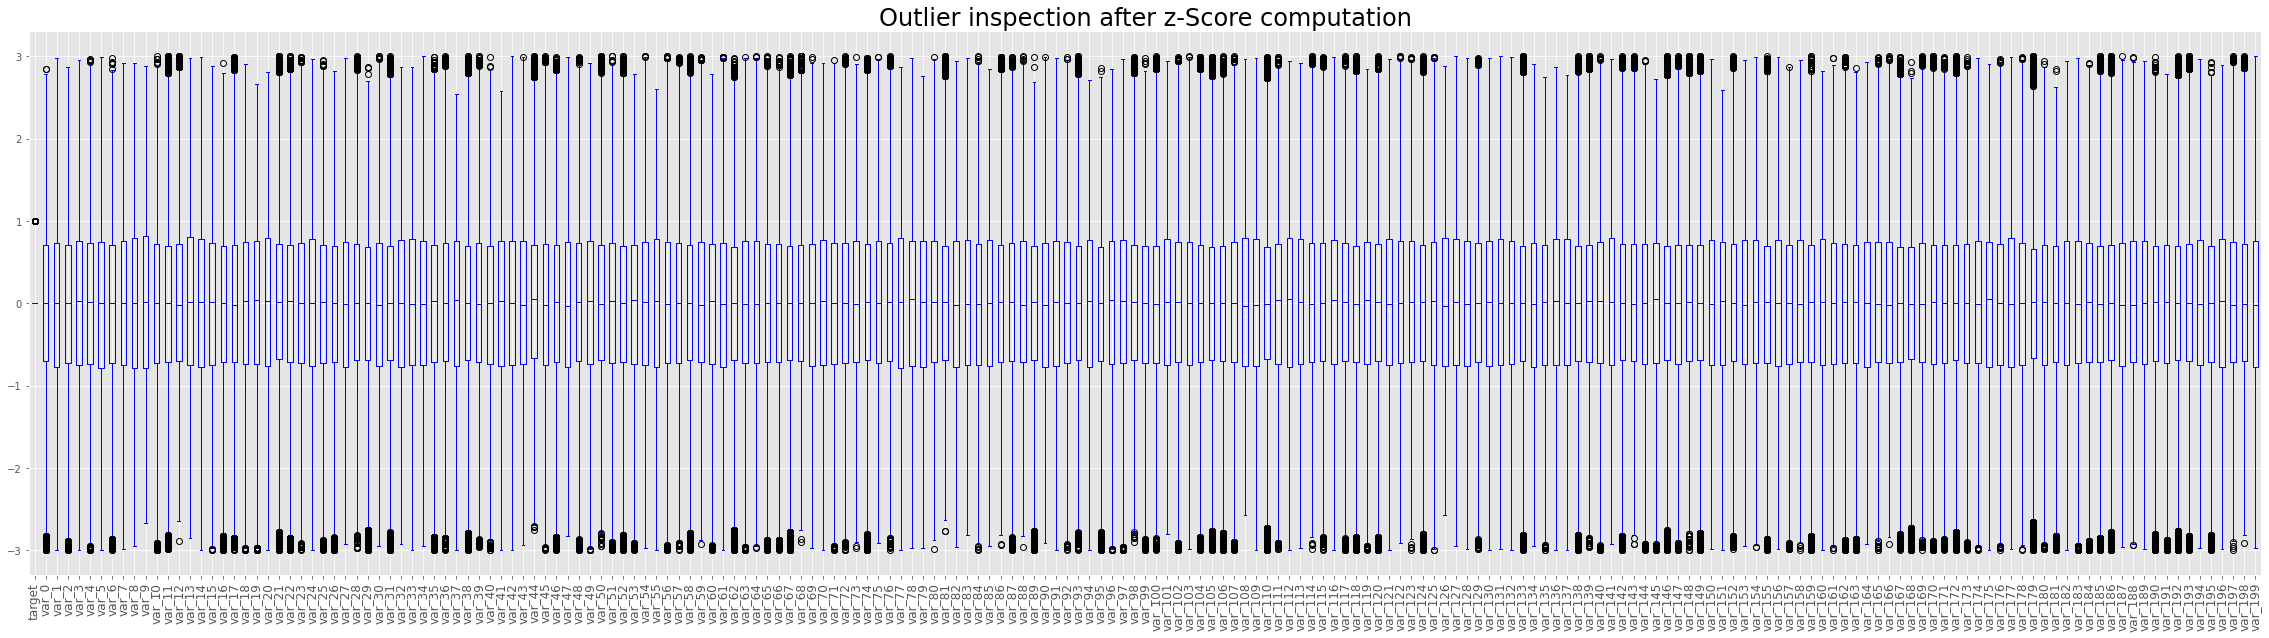

In [ ]:
# Visualize feature distribution after z-score removal
plt.figure(figsize = (40, 10))

df_trimmed.boxplot(color = "blue");

plt.title("Outlier inspection after z-Score computation", fontsize = 24)
plt.xticks(rotation = 90, fontsize = 12);

In [ ]:
print(f"The shape of the trimmed dataset is as follows:{df_trimmed.shape}") 

The shape of the trimmed dataset is as follows:(183864, 201)


## M1) Base Modelling

A good starting point for picking potentially good algorithms is the sklearn map:


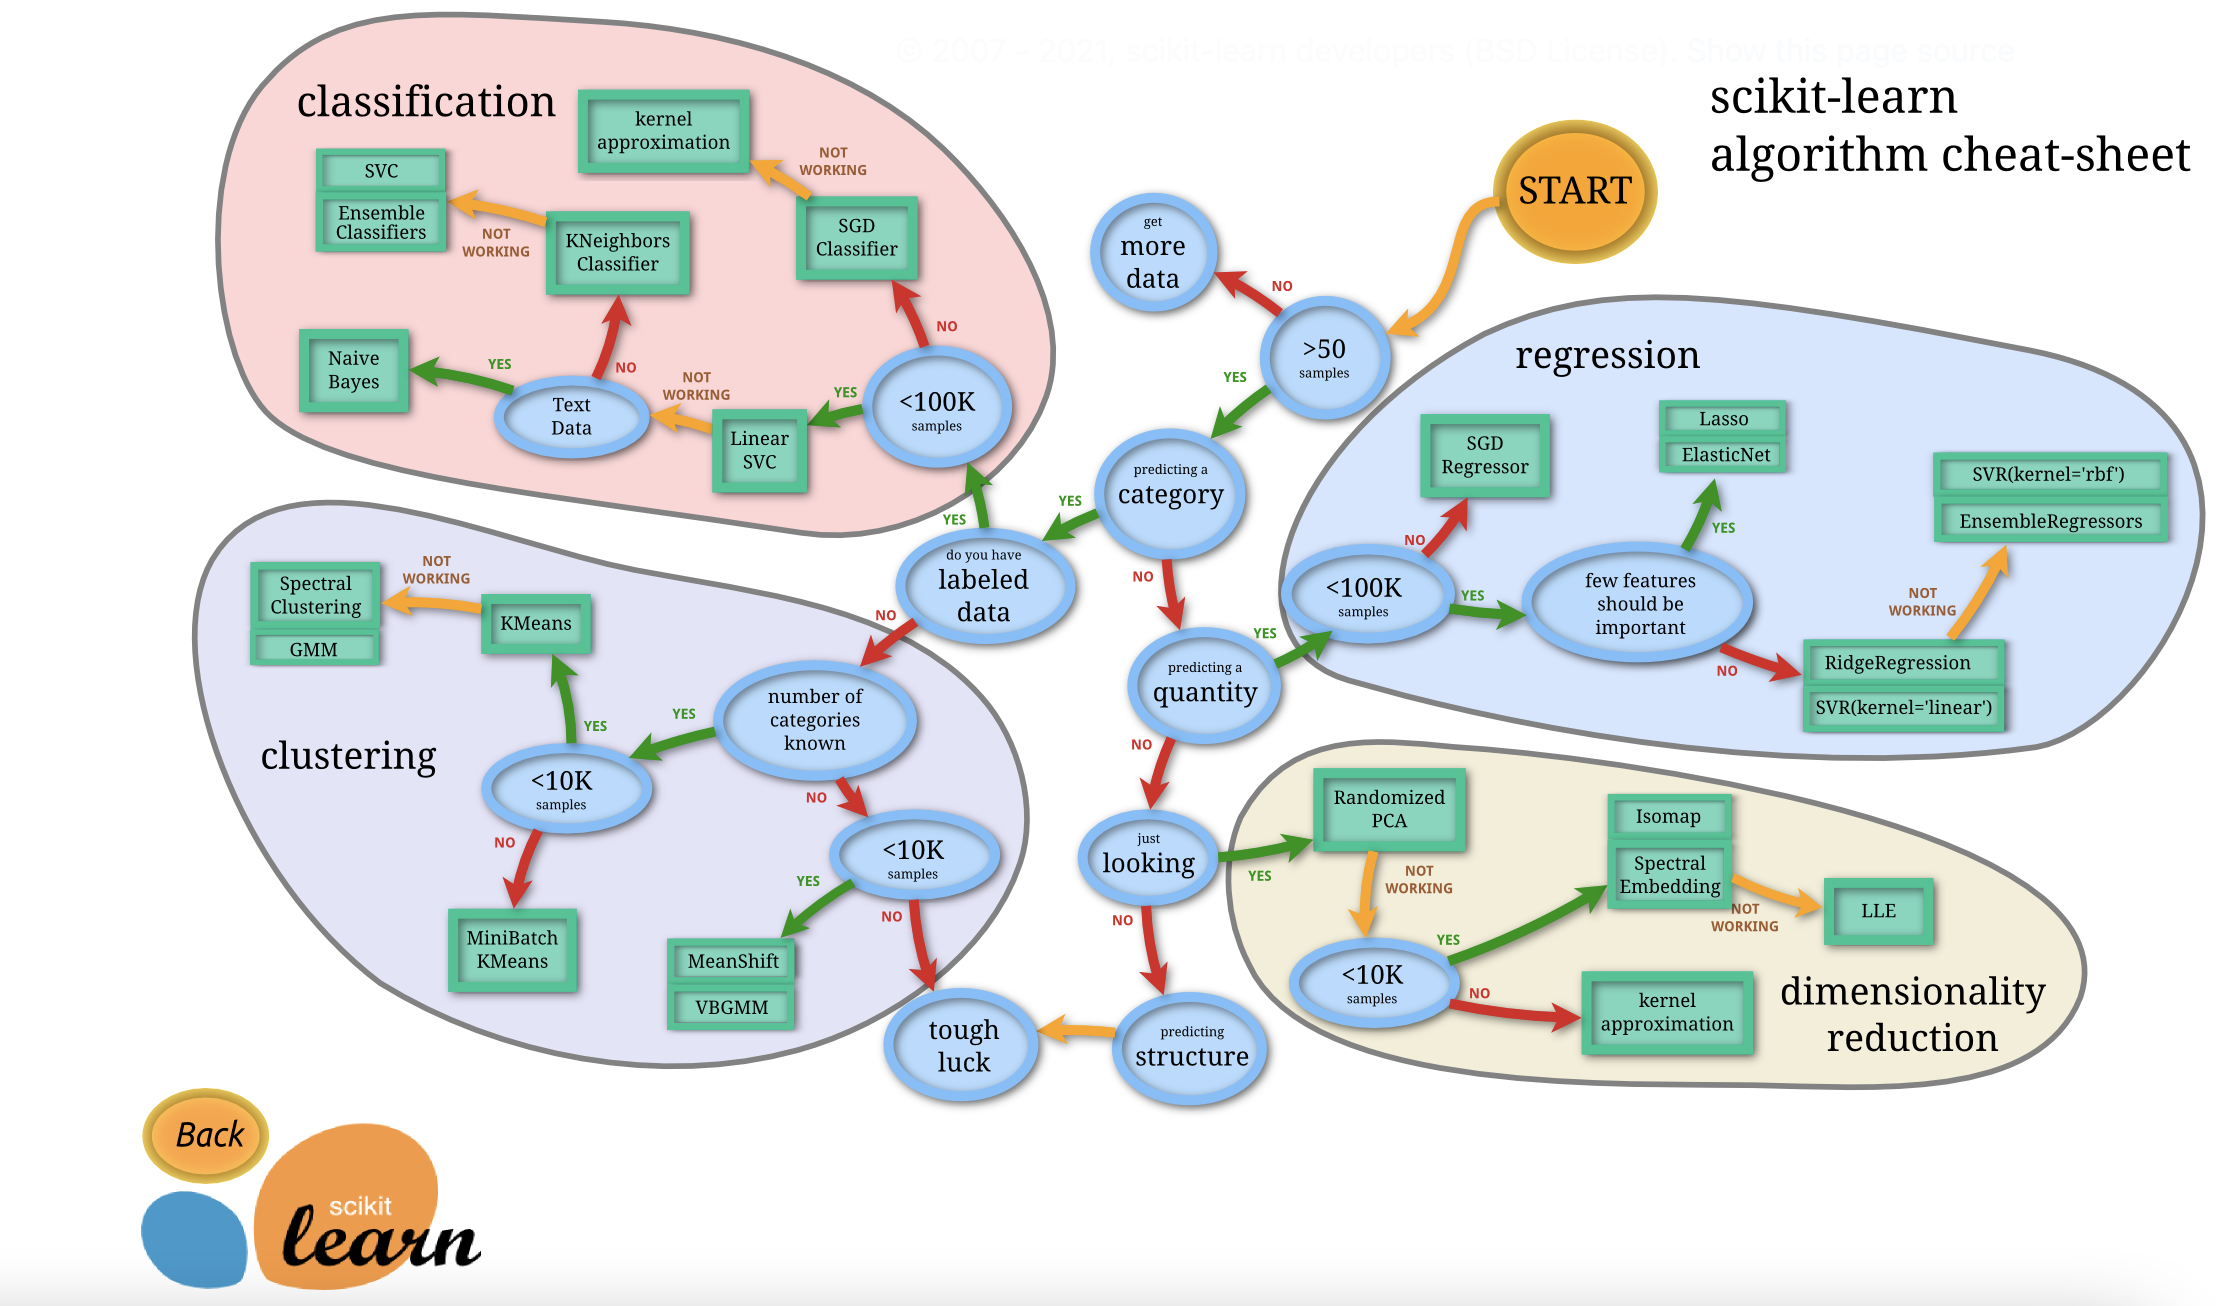

### Create Training & Validation Set

Since data is not an issue, it is suggested to divide your dataset into three parts to avoid overfitting and model selection bias called.

> We try to build a model upon training set then try to optimize hyperparameters on the validation set as much as possible then after our model is ready, we try and evaluate the testing set.

In [ ]:
# Split the data
X = df_trimmed.drop("target", axis = 1)
y = df_trimmed["target"]

X.shape, y.shape

((183864, 200), (183864,))

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data in Training and Validation Set
X_train ,X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(147091, 200) (147091,) (36773, 200) (36773,)


As we earlier mentioned, the target column is highly unevenly distributed. This means the target column consists of around 90% Zeros and only 10% Ones. In such cases, we must adequately split our dataset. 
In sklearn, we use train_test_split-function which accepts an additional parameter called stratify which we set to the target column.

In order to check if this strategy works, we print the percentages of each target-class after splitting the data.

In [ ]:
#Check target distribution

zeros_train = len(y_train[y_train == 0]) / len(y_train)
ones_train = len(y_train[y_train == 1]) / len(y_train)

zeros_valid = len(y_valid[y_valid == 0]) / len(y_valid)
ones_valid = len(y_valid[y_valid == 1]) / len(y_valid)


print(f"target-distribution of training set: {round(zeros_train, 2)*100}% are Zeroes and {round(ones_train, 2)*100}% are Ones\n")

print(f"target-distribution of validation set: {round(zeros_valid, 2)*100}% are Zeroes and {round(ones_valid, 2)*100}% are Ones")


target-distribution of training set: 90.0% are Zeroes and 10.0% are Ones

target-distribution of validation set: 90.0% are Zeroes and 10.0% are Ones


### Define Evaluation Metrics

In classification problems, we often refer to the following evaluation criteria:
- `accuracy_score` = Out of all data points, how many did we correctly classify?
- `precision` = Out of all positively classified points, how many are correct?
- `recall` = Out of all positive labeled points, how many are correct classified?
- `f1_score` = favors models that have similar precision and recall scores
- `confusion matrix` = provides numbers of true positives, true negatives, false positives and false negative data points.


But, the most important metric for our case is the **AUC - Area Under the Curve:**
- A **receiver operating characteristic curve**, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
- The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
- The true-positive rate is also known as sensitivity, **recall** or **probability of detection**

In [ ]:
# Import metrics
from sklearn.metrics import roc_auc_score

**Base Estimators**

Looking into the sklearn-library, we can choose many algorithms.

For our case, the following algorithms are considered and continously and iteratively evaluated:
- RandomForest
- LogisticRegression
- SVM
- K-Nearest-Neighbors

### Base: Logistic Regression

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate model
logreg = LogisticRegression()

# Fit model
logreg.fit(X_train, y_train)

# Predict values
y_pred_proba = logreg.predict_proba(X_valid)[:, 1]

# Compute ROC-AUC-Score
roc_auc = roc_auc_score(y_valid, y_pred_proba)


**Plot ROC-Curve**

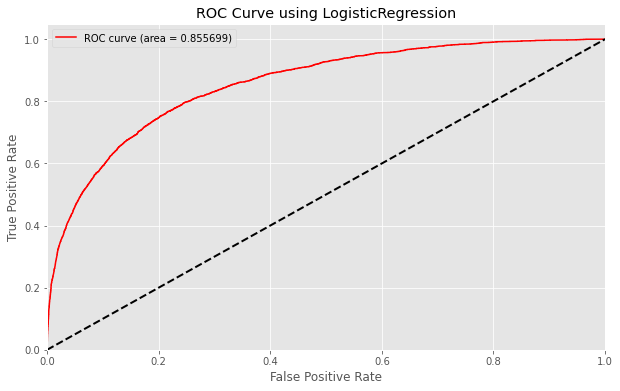

In [ ]:
# Import module
from sklearn.metrics import roc_curve

# Extract FPR and TPR
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)

# Create Plot
plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = "red", label = f"ROC curve (area = {round(roc_auc, 6)})")
plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using LogisticRegression')
plt.legend(loc="upper left")
plt.show()

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {"penalty": ["l1", "l2"],
          "solver": ["lbfgs", "newton-cg", "sag"],
          "C": [0.001, 0.01, 0.1, 1, 10, 100],
          "class_weight": [None, "balanced"]}

lr_rscv = RandomizedSearchCV(estimator = logreg,
                             param_distributions = params,
                             n_iter = 50,
                             scoring = "roc_auc",
                             n_jobs = -1,
                             random_state = 42)

random_search = lr_rscv.fit(X_train, y_train)

print(f"Best LogisticRegression-estimator: {random_search.best_estimator_}\n")
print(f"Best ROC-AUC-Score: {random_search.best_score_}\n")
print(f"Best parameters used: {random_search.best_params_}")



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

Best LogisticRegression-estimator: LogisticRegression(C=0.001, solver='newton-cg')

Best ROC-AUC-Score: 0.8578798925680859

Best parameters used: {'solver': 'newton-cg', 'penalty': 'l2', 'class_weight': None, 'C': 0.001}


In [ ]:
# Perform GridSearchCV
from sklearn.model_selection import GridSearchCV

params_gscv = {"C": np.arange(0.0001, 1, 0.01)}

lr_gscv = GridSearchCV(estimator = LogisticRegression(solver = "sag"),
                       param_grid = params_gscv,
                       scoring = "roc_auc",
                       n_jobs = -1,
                       cv = 5)

lr_gscv.fit(X_train, y_train)

print(f"Best LogisticRegression-estimator: {lr_gscv.best_estimator_}\n")
print(f"Best ROC-AUC-Score: {lr_gscv.best_score_}\n")
print(f"Best parameters used: {lr_gscv.best_params_}")


Best LogisticRegression-estimator: LogisticRegression(C=0.0001, solver='sag')

Best ROC-AUC-Score: 0.8579846711649284

Best parameters used: {'C': 0.0001}


**Plot ROC-Curve**

In [ ]:
lr_gscv_best = LogisticRegression(solver = "sag",
                                  C = 0.0001)

lr_gscv_best.fit(X_train, y_train)

y_pred_proba_gscv = lr_gscv_best.predict_proba(X_valid)[:, 1]

roc_auc_gscv = roc_auc_score(y_valid, y_pred_proba_gscv)


# Extract FPR and TPR
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba_gscv)

# Create Plot
plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = "red", label = f"ROC curve (area = {round(roc_auc, 6)})")
plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using GridSearchCV for LogReg')
plt.legend(loc="upper left")
plt.show()

### Base: GaussianNB()

**Naïve Bayes** is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks. In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (normal distribution).



In [ ]:
# Import GaussianNB
from sklearn.naive_bayes import GaussianNB

# Instantiate classifier
gnb = GaussianNB()

# Fit the classifier to the training set
gnb.fit(X_train, y_train)

# Predict target values for validation set
y_pred_nb = gnb.predict_proba(X_valid)[:,1]

# Compute ROC-AUC-Score
roc_auc_nb = roc_auc_score(y_valid, y_pred_nb)

# Print score
print(f"The GaussianNB-Classifier scores an ROC-AUC of {np.round(roc_auc_nb, 6)}")

The GaussianNB-Classifier scores an ROC-AUC of 0.886228


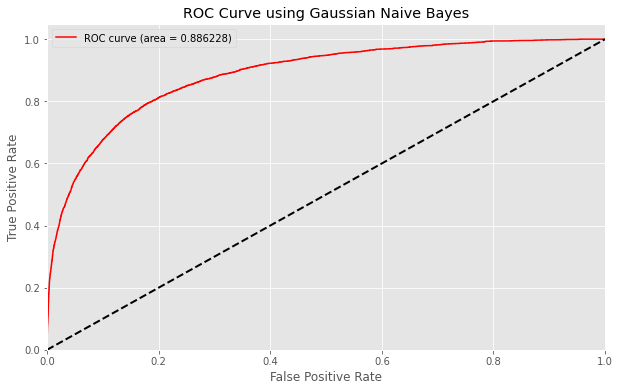

In [ ]:
from sklearn.metrics import roc_curve
# Extract FPR and TPR
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_nb)

# Create Plot
plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = "red", label = f"ROC curve (area = {round(roc_auc_nb, 6)})")
plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Gaussian Naive Bayes')
plt.legend(loc="upper left")
plt.show()

**Hyperparameter Tuning**

In correspondence to the LogisticRegression-model, we perform run another test run after using GridSearchCV to assess best estimator and parameters.

For the **`GaussianNB()`**-Classifier we can only improve the **`var_smoothing`** parameter. **`var_smoothing`** is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define scope of parameter var_smoothing
params_gnb = {"var_smoothing": np.logspace(0, -9, 100)}

# Instantiate the GridSearchCV
gnb_gscv = GridSearchCV(estimator = GaussianNB(),
                        param_grid = params_gnb,
                        scoring = "roc_auc",
                        cv = 5)

# Fit the GridSearchCV to Training set
gnb_gscv.fit(X_train, y_train)

# Print results
print(f"Best GaussianNB-estimator: {gnb_gscv.best_estimator_}\n")
print(f"Best ROC-AUC-Score: {gnb_gscv.best_score_}\n")
print(f"Best parameters used: {gnb_gscv.best_params_}")


Best GaussianNB-estimator: GaussianNB(var_smoothing=8.111308307896872e-07)

Best ROC-AUC-Score: 0.8877366377247349

Best parameters used: {'var_smoothing': 8.111308307896872e-07}


In [ ]:
best_gnb = gnb_gscv.best_estimator_

best_gnb.fit(X_train, y_train)

y_pred_bestgnb = best_gnb.predict_proba(X_valid)[:, 1]

roc_auc_bestgnb = roc_auc_score(y_valid, y_pred_bestgnb)

print(f"The GaussianNB-Classifiers scores an ROC-AUC-Score of {round(roc_auc_bestgnb, 6)} after GridSearchCV")

The GaussianNB-Classifiers scores an ROC-AUC-Score of 0.886228 after GridSearchCV


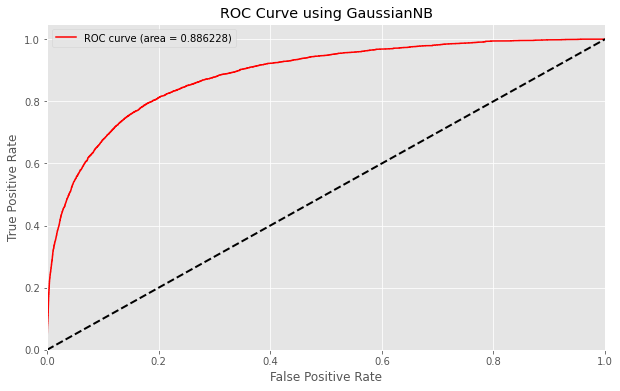

In [ ]:
from sklearn.metrics import roc_curve
# Extract FPR and TPR
fpr_gscv, tpr_gscv, thresholds_gscv = roc_curve(y_valid, y_pred_nb)

# Create Plot
plt.figure(figsize = (10, 6))
plt.plot(fpr_gscv, tpr_gscv, color = "red", label = f"ROC curve (area = {round(roc_auc_bestgnb, 6)})")
plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using GaussianNB')
plt.legend(loc="upper left")
plt.show()

### Base: ComplementNB()

Naive Bayes is affected by imbalanced target values. The Imbalanced classification problem is what we face when there is a severe skew in the class distribution of our training data.

Before we apply the ComplementnB() we must take care of negative values. Therefore we first apply the MinMaxScaler() which scales the data in the range from 0 to 1.

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

# Instantiate the Scaler
mm_scaler = MinMaxScaler()

# Fit and scale the Training and Validation set
X_train_mm = mm_scaler.fit_transform(X_train)
X_valid_mm = mm_scaler.transform(X_valid)

# Instantiate the Classifier
cnb = ComplementNB()

# Fit the Classifier to the training data
cnb.fit(X_train_mm, y_train)

# Predict 
y_pred_cnb = cnb.predict_proba(X_valid_mm)[:,1]
# Assess
roc_auc_cnb = roc_auc_score(y_valid, y_pred_cnb)

roc_auc_cnb


0.8557200321075854

Well, in our case the ComplementNB does not reach the ROC-AUC-metric and score 3% below the GaussianNB(). However let's see, if we can improve the score of our GaussianNB by applying the MinMaxScaler.

When we remember the sklearn estimator-map, we see that sklearn suggests to try the SGDClassifier() (Stochastic Gradient Descent). This algorithm works using the default learning rate schedule, the data should have zero mean and unit variance.



### SGDClassifier()

- When we remember the sklearn estimator-map, we see that sklearn suggests to try the SGDClassifier() (Stochastic Gradient Descent). 
- This algorithm works using the default learning rate schedule, the data should have zero mean and unit variance.

The model it fits can be controlled with the `loss` parameter; by default, it fits a linear support vector machine (SVM). This means we can apply the various algorithms using the SGD-method:
- `hinge` = SVM
- `log_loss` = Logistic Regression
- `modified_huber` = tolerates outliers & probability estimates
- `squared_hinge` = SVM but quadratically penalizes
- `perceptron` = linear loss used by Perceptron algorithm

We want to assess all of the 5 loss functions in order to get best ROC-AUC-Score therefore GridSearchCV can be applied.

Before applying the SGDClassifiers sklearn suggests to standardize features in order to make them havin zero mean and uniform variance.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = "perceptron")
ss_scaler = StandardScaler()

# Scale X
X_scaled = pd.DataFrame(ss_scaler.fit_transform(X))

# Split the data in Training and Validation Set
X_train ,X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Train SGDClassifier
sgd_clf.fit(X_train, y_train)

# Make predictions
y_pred = sgd_clf.predict(X_valid)

# Compute ROC-AUC-Score
auc = roc_auc_score(y_valid, y_pred)
auc

0.6548725815841445

**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_valid)[:, 1]
roc_auc_score(y_valid, y_pred_proba)

roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score>

## 3) Feature Engineering

In this phase, we aim to improve the score of our four models by adding or creating new features.

This is an iterative stage where we verify our feature engineering steps and apply the engineered data to the models.

The following has been done:
- There are no missing values
- We identified most of the features as numerical and continuous ones
- We identified skewness and removed it using the PowerTransformer()
- We detected outliers and removed them by using the z-score and 3* standard deviations

Next, we want to rebalance the target feature by oversampling and undersampling.

### Oversampling

Oversampling is a technique that duplicates samples of the minority class. Selecting random examples from the minority class with replacement and supplementing the training data with multiple copies of this instance may result in overfitting or an increasing computation costs due to increasing the number of examples.

More information to the package: https://imbalanced-learn.org/stable/over_sampling.html


In [ ]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Instantiate RandomOverSampler
ros = RandomOverSampler()

# Fit and Resample 
X_ros, y_ros = ros.fit_resample(X, y)

# Get the shape
print(f"The shape of the features is {X_ros.shape}")
print(f"The shape of the target is {y_ros.shape}")

The shape of the features is (330840, 200)
The shape of the target is (330840,)


**Train Classifiers on Oversampled data**

Before we apply both classifiers - LogisticRegression and GaussianNB to the oversampled data, we define a function that visualizes the ROC-AUC-Score and compares it.

In [ ]:
from sklearn.metrics import roc_curve

def compare_classifiers(classifiers, X, y):
  
  # Create empty lists #########################################################
  metrics_dict = {"ROC_AUC_Score": []}
  
  # Split data
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                        test_size = 0.2,
                                                        random_state = 42)
  # Iterate through dictionary and compute scores
  for name, clf in classifiers.items():

    # Train classifier
    clf.fit(X_train, y_train)

    # Predict target values
    y_pred = clf.predict_proba(X_valid)[:, 1]

    # Evaluate scores ##########################################################
    auc = roc_auc_score(y_valid, y_pred)

    # Append scores in the dictionary
    metrics_dict["ROC_AUC_Score"].append(auc)

    # Plot ROC-AUC-Curve #######################################################
    fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

    # Create Plot
    plt.figure(figsize = (10, 6))
    plt.plot(fpr, tpr, color = "red", label = f"ROC curve (area = {round(auc, 6)})")
    plt.plot([0, 1], [0, 1], color = "black", lw = 2, linestyle = "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve using {name}")
    plt.legend(loc="upper left")
    plt.show()

  # Create Dataframe
  classifier_names = list(classifiers.keys())
  df_metrics = pd.DataFrame.from_dict(metrics_dict,
                                      orient = "index",
                                      columns = classifier_names)
  
  df_metrics = df_metrics.transpose()

  return df_metrics


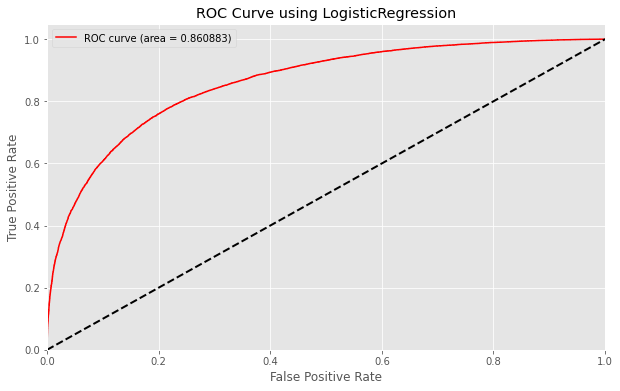

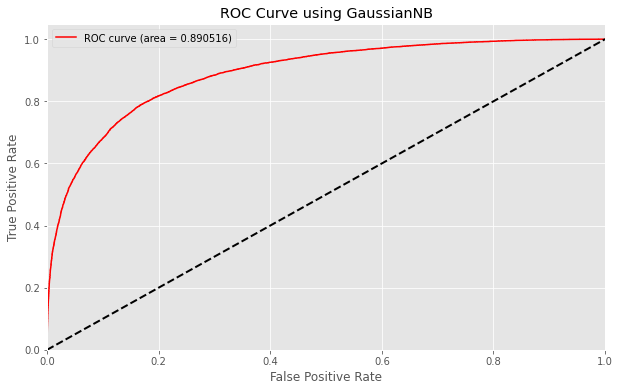

,ROC_AUC_Score
LogisticRegression,0.860883
GaussianNB,0.890516


In [ ]:
# Create dictionary of classifiers
classifiers = {"LogisticRegression": logreg,               
               "GaussianNB": gnb}

# Run the function
compare_classifiers(classifiers, X_ros, y_ros)

Great, we were able to increase the ROC-AUC-SCore from 0.8862 to 0.8905 which is an increase of 0.43%.

### Undersampling

More information to the package: https://imbalanced-learn.org/stable/under_sampling.html

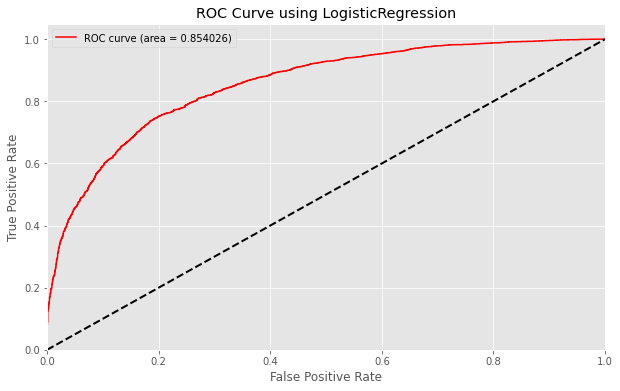

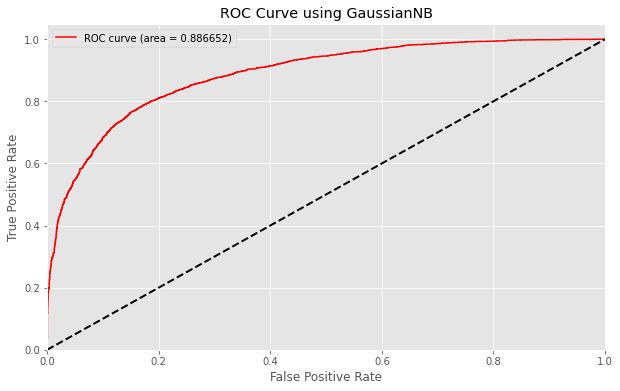

,ROC_AUC_Score
LogisticRegression,0.854026
GaussianNB,0.886652


In [ ]:
# IMport random under-sampling
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler()

# Transform X-features and y-target
X_rus, y_rus = rus.fit_resample(X, y)

# Create dictionary of classifiers
classifiers = {"LogisticRegression": logreg,               
               "GaussianNB": gnb}

# Run the function
compare_classifiers(classifiers, X_rus, y_rus)

Both LogisticRegression and GaussianNB performs worse compared to the Base Models and the Resampled models using RandomOverSampler.

Even though, oversampling affects the computational efficiency negatively, we stick to this method since it gives us the best score.



### PCA

Using PCA and thus reducing dimensions might facilitate computations within the model. This reduces complexity and the risk of overfitting. Moreover, we might be able to gain som computational performance due to reducing the size of the datapoints.

## 3) Feature Engineering

####  Checking Collinearity

Features that have high collinearity, i.e. moving together in the same direction, might be redundant and therefore are of no need for the ML-model.

Here, we create a heatmap based on the correlation of all features except the target value.

If, we see a feature correlating strongly with the ID_code, we might drop it, since this can be a feature related to the customer specific ID number.


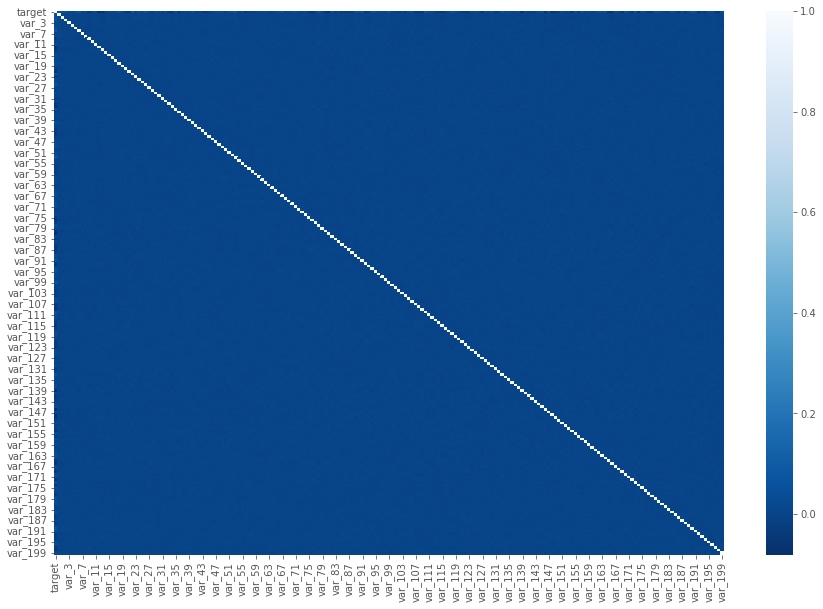

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = "Blues_r");

The heatmap does not give us any hint about collinearily moving features.

Therefore we are unable to drop any features and try binning for improving results in terms of getting information about similarly moving features.

#### Checking Multi-Collinearity
- https://medium.com/analytics-vidhya/what-is-multicollinearity-and-how-to-remove-it-413c419de2f
- https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2
- https://medium.com/analytics-vidhya/removing-multi-collinearity-for-linear-and-logistic-regression-f1fa744f3666